### Required Libraries

In [1]:
import pandas as pd                #For handling dataframes
import numpy as np                 #For handling arrays
import matplotlib.pyplot as plt    #For plots
import seaborn as sns              #To plot histograms
from math import sqrt              #To find the square root of MSE
from scipy import stats            #For randint()
from sklearn.preprocessing import StandardScaler     #To scale the features
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  
from sklearn.svm import SVR        #To build SVR model
from sklearn.tree import DecisionTreeRegressor       #To build Decision Tree model
from sklearn.ensemble import RandomForestRegressor   #To build Random Forest model
from sklearn.metrics import mean_squared_error, r2_score   #To calculate accuracy metrics: R2 and RMSE

In [10]:
plants = pd.read_csv("C:\\Users\\jyoth\\OneDrive\\Desktop\\Internshala\\Mechademy\\propulsion.csv", index_col="S.No.")
plants.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
S.No.,,,,,,,,,,,,,,,,,,
0,9.300,27,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18,29760.552,2306.825,8780.012,246.011,246.011,776.921,288,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9,8375.774,1386.739,7051.621,60.318,60.318,589.764,288,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9,8377.589,1386.748,7098.469,60.339,60.339,570.651,288,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18,29761.091,2306.825,8782.024,246.021,246.021,769.855,288,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [3]:
#Printing number of rows and column in the dataset
plants.shape

(10000, 18)

In [4]:
#Obtaining the number of missing values in each column
plants.isna().sum()

Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor decay state coefficient.           0
GT Turbine decay state coefficient.              0
dtype: int64

In [5]:
#To learn more about the values ikn each column
plants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        10000 non-null  float64
 1   Ship speed (v) [knots]                         10000 non-null  int64  
 2   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 3   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 7   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 8   GT Compressor inlet air temperature (T1) [C]   10000 non-null  int64  
 9   GT Compressor outlet air temperature (T2) [C]  1000

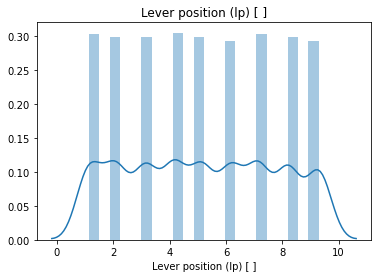

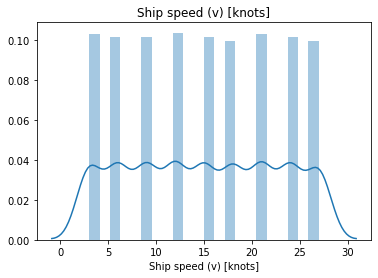

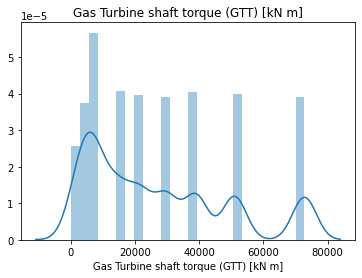

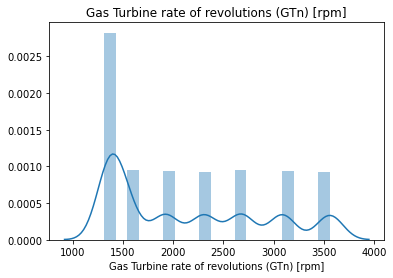

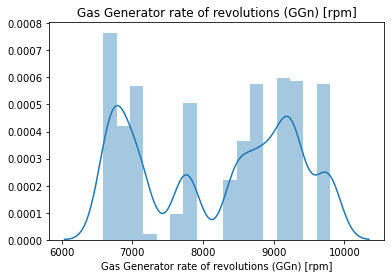

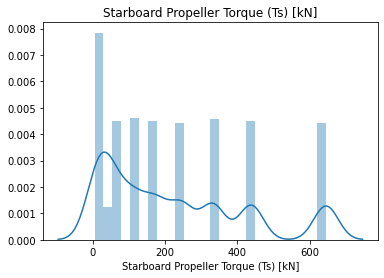

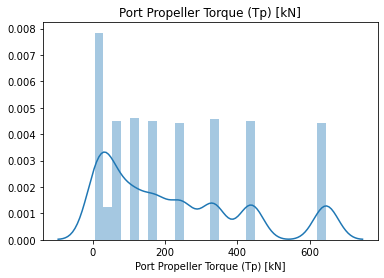

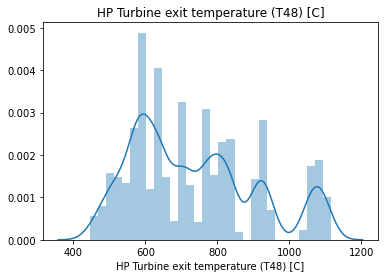

C:\Users\jyoth\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


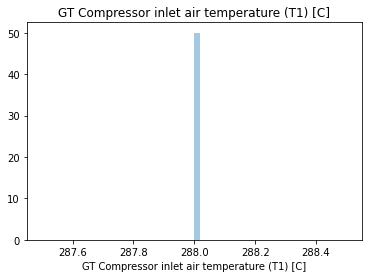

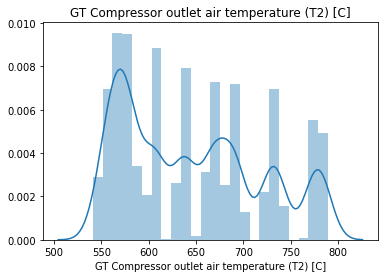

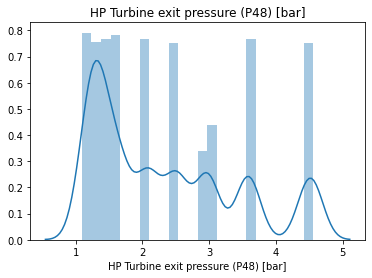

C:\Users\jyoth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


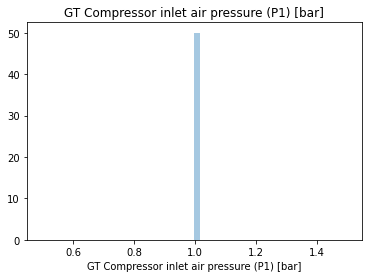

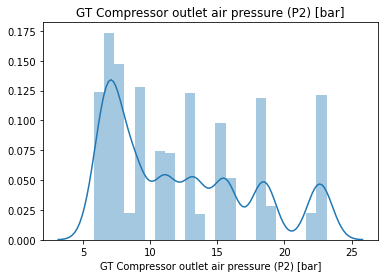

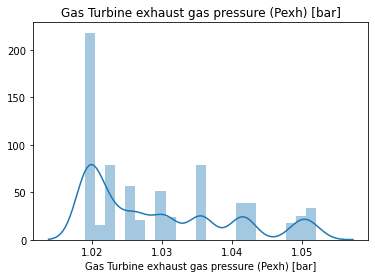

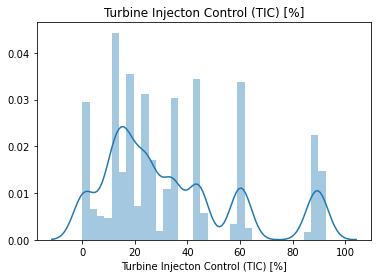

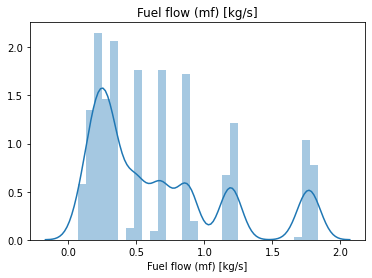

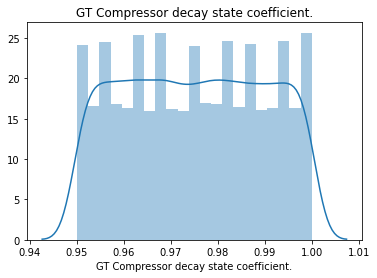

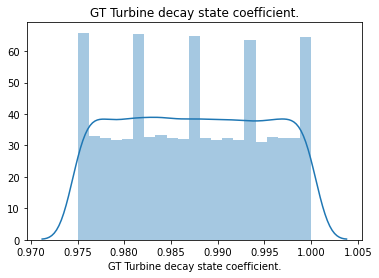

In [6]:
#Plotting the histogram for the values all the columns
def dist_plot(dat):
    for col in dat.columns:
        sns.distplot(dat[col])
        plt.title(col)
        plt.show()
dist_plot(plants)

In [7]:
#Obtaining the measure of Descriptive Statistics for each column
plants.describe()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


Since "GT Compressor inlet air temperature (T1) [C]" and "GT Compressor inlet air pressure (P1) [bar]" both have a standard deviation of 0, it implies that the column is more of a constant and can be removed.

In [8]:
#Dropping the unnecessary columns
plants.drop(["GT Compressor inlet air temperature (T1) [C]", "GT Compressor inlet air pressure (P1) [bar]"],axis=1,inplace=True)

## Bivariate

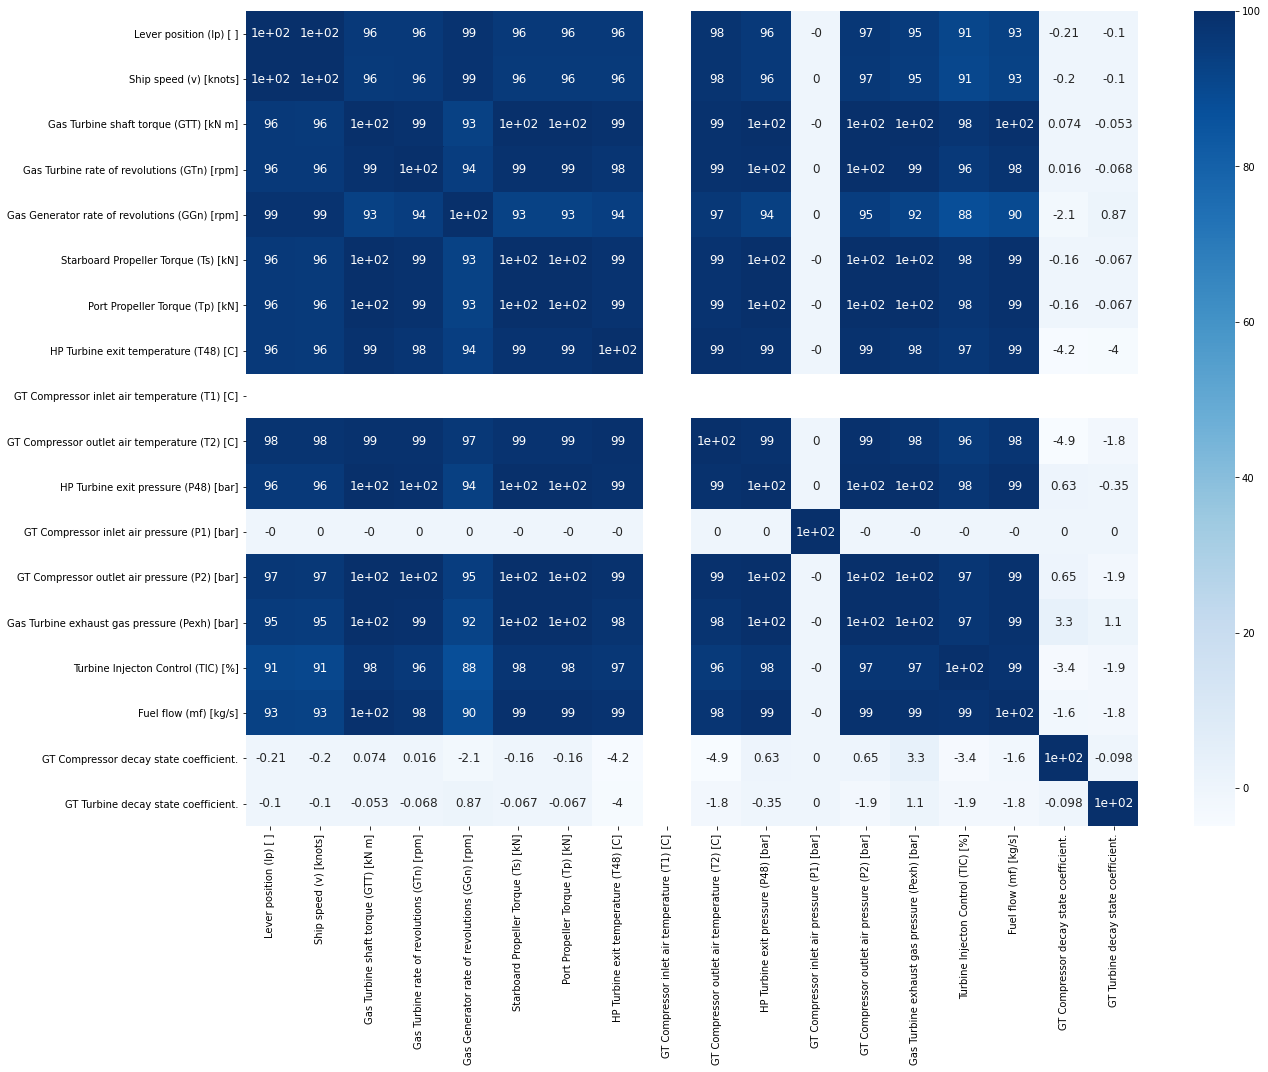

In [11]:
#Plotting a heatmap that shows the correlation between all the variables
corr = round(plants.corr()*100,3)
sns.heatmap(corr, annot = True, annot_kws={'size':12}, cmap="Blues")
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation matrix, it is seen that "GT Compressor decay state coefficient" and "GT Turbine decay state coefficient" do not have a strong linear relaionship with any of the other variables. Hence, linear regression will not be a good model.
It is also noticed that there is high multicollinearity between the regressors.

# Modeling

## Predicting Compressor Decay Coefficient

In [13]:
X_comp = plants.drop("GT Compressor decay state coefficient.", axis=1)
y_comp = plants["GT Compressor decay state coefficient."]

In [14]:
#Scaling the independent variables so that they have 0 mean and unit variance
X_comp = pd.DataFrame(StandardScaler().fit_transform(X_comp), columns = X_comp.columns)
X_comp.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient.
0,1.581596,1.556651,2.069723,1.850934,1.430177,2.097094,2.097094,2.035294,0.0,1.856458,2.014154,1.0,1.995358,1.989602,2.214359,2.240446,-1.259128
1,0.390614,0.393872,0.120567,0.227505,0.537205,0.100403,0.100403,0.245345,0.0,0.272657,0.159362,1.0,0.220918,0.057762,0.043362,0.051310,-1.658640
2,-0.764544,-0.768907,-0.848751,-0.964049,-1.047727,-0.829327,-0.829327,-0.836484,0.0,-0.899041,-0.882282,1.0,-0.882727,-0.908158,-0.816616,-0.816420,-1.259128
3,-0.764544,-0.768907,-0.848669,-0.964037,-1.004767,-0.829222,-0.829222,-0.946964,0.0,-0.954533,-0.884132,1.0,-0.912236,-0.811566,-0.847681,-0.848118,1.670625
4,0.390614,0.393872,0.120591,0.227505,0.539050,0.100453,0.100453,0.204501,0.0,0.247422,0.159362,1.0,0.208889,0.154354,0.026177,0.033480,-0.992787


In [15]:
X_comp.shape

(10000, 17)

In [16]:
y_comp

S.No.
0       0.973
1       0.995
2       0.980
3       0.984
4       0.998
        ...  
9995    0.999
9996    0.971
9997    0.953
9998    0.982
9999    0.981
Name: GT Compressor decay state coefficient., Length: 10000, dtype: float64

In [183]:
#Splitting the dataset into train and test datasets
X_comp_train, X_comp_test, y_comp_train, y_comp_test = train_test_split(X_comp,y_comp,test_size=0.3)

### Support Vector Regressor (SVR)

In [19]:
svr = SVR()

In [20]:
svr.fit(X_comp_train,y_comp_train)

SVR()

In [21]:
comp_pred = svr.predict(X_comp_test)

In [23]:
#Computing RMSE and r2 score
print("RMSE: ", sqrt(mean_squared_error(y_comp_test, comp_pred)))
print("r2: ", r2_score(y_comp_test,comp_pred))

RMSE:  0.014693921645814418
r2:  -0.0001614091679171814


In [ ]:
svr_parameters = [{'C': [1,5,10,20,50,100,1000], 'kernel': ['linear']},
              {'C': [1,5,10,20,50,100,1000], 'kernel': ['rbf'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1,5,10,20,50,100,1000], 'kernel':['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [65]:
#Using GridSearchCV to obtain the most optimal combination of hyperparameters for the SVR model
grid_search = GridSearchCV(estimator = svr,
                       param_grid = svr_parameters,
                       scoring = 'r2',          #sorted(sklearn.metrics.SCORERS.keys())---to see 
                       cv = 10,
                       n_jobs = -1)
grid_search = grid_search.fit(X_comp_train, y_comp_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: -0.30 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


In [26]:
svr_best = SVR(C=1, kernel='linear')

In [27]:
svr_best.fit(X_comp_train,y_comp_train)

SVR(C=1, kernel='linear')

In [28]:
svr_comp_pred = svr_best.predict(X_comp_test)

In [29]:
print("RMSE: ", sqrt(mean_squared_error(y_comp_test, svr_comp_pred)))
print("r2: ", r2_score(y_comp_test,svr_comp_pred))

RMSE:  0.014693921645814418
r2:  -0.0001614091679171814


The best SVR model is a weak one as it has a very low r2 score and a high RMSE.

### Decision Tree

In [31]:
dtr = DecisionTreeRegressor(criterion="mse",random_state=0)

In [32]:
dtr.fit(X_comp_train,y_comp_train)

DecisionTreeRegressor(random_state=0)

In [33]:
comp_pred = dtr.predict(X_comp_test)

In [36]:
print("RMSE:",sqrt(mean_squared_error(y_comp_test, comp_pred)))
print("r2 score:",r2_score(y_comp_test,comp_pred))

RMSE: 0.0017548029329053846
r2 score: 0.9857356706643572


In [ ]:
dtr_parameters = {"max_depth": [3, None],
             "criterion": ["mse"],
              "max_features": stats.randint(1, X_comp.shape[1]),       # [1,2,3,4,5,6,7,8,9, "log2", "sqrt"], 
              "min_samples_leaf": stats.randint(1, X_comp.shape[1])}

In [71]:
#Using RandomizedSearchCV to obtain the most optimal combination of hyperparameters for the Decision Tree Regressor
random_search = RandomizedSearchCV(estimator = dtr,
                       param_distributions = dtr_parameters,
                       scoring = 'r2',                   #sorted(sklearn.metrics.SCORERS.keys())---to see 
                       cv = 10,
                       n_jobs = -1)
random_search = random_search.fit(X_comp_train, y_comp_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 98.51 %
Best Parameters: {'criterion': 'mse', 'max_depth': None, 'max_features': 12, 'min_samples_leaf': 3}


In [76]:
#Building a Decision Tree Regressor with the best hyperparameter values, obtained above
dtr_best = DecisionTreeRegressor(criterion="mse", max_depth=None, max_features= 12, min_samples_leaf=3, random_state=0)

In [77]:
dtr_best.fit(X_comp_train,y_comp_train)

DecisionTreeRegressor(max_features=12, min_samples_leaf=3, random_state=0)

In [78]:
dtr_comp_pred = dtr_best.predict(X_comp_test)

In [79]:
print("RMSE: ", sqrt(mean_squared_error(y_comp_test, dtr_comp_pred)))
print("r2: ", r2_score(y_comp_test,dtr_comp_pred))

RMSE:  0.0019137194974224447
r2:  0.9830351033886798


THe decision tree model giving the best accuracy on the test data is the model with the initial conditions and criterion: "mse".

### Random Forest Regressor

In [50]:
rfr = RandomForestRegressor()

In [51]:
rfr.fit(X_comp_train,y_comp_train)

RandomForestRegressor()

In [52]:
#Obtaining the importance of all the features in the Random Forest Regressor model
feature_imp = pd.Series(rfr.feature_importances_,index=X_comp_train.columns).sort_values(ascending=False)
print("Important Features are :\n",feature_imp)

Important Features are :
 GT Compressor outlet air temperature (T2) [C]    0.310677
HP Turbine exit pressure (P48) [bar]             0.205874
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.138754
Gas Turbine shaft torque (GTT) [kN m]            0.129420
Gas Generator rate of revolutions (GGn) [rpm]    0.127185
Gas Turbine rate of revolutions (GTn) [rpm]      0.029811
GT Turbine decay state coefficient.              0.015188
Turbine Injecton Control (TIC) [%]               0.009216
Starboard Propeller Torque (Ts) [kN]             0.008691
Port Propeller Torque (Tp) [kN]                  0.007647
Fuel flow (mf) [kg/s]                            0.006694
GT Compressor outlet air pressure (P2) [bar]     0.006376
HP Turbine exit temperature (T48) [C]            0.003260
Ship speed (v) [knots]                           0.000650
Lever position (lp) [ ]                          0.000558
GT Compressor inlet air pressure (P1) [bar]      0.000000
GT Compressor inlet air temperature (T1) [C]  

Clearly "GT Compressor inlet air pressure (P1) [bar]" and "GT Compressor inlet air temperature (T1) [C]" are not significant predictors and hence, should be removed.

In [184]:
X_comp_train.drop(["GT Compressor inlet air pressure (P1) [bar]", "GT Compressor inlet air temperature (T1) [C]"], axis=1, inplace=True)
X_comp_test.drop(["GT Compressor inlet air pressure (P1) [bar]", "GT Compressor inlet air temperature (T1) [C]"], axis=1, inplace=True)

In [185]:
rfr.fit(X_comp_train,y_comp_train)

RandomForestRegressor()

In [186]:
rfr_comp_pred = rfr.predict(X_comp_test)

In [187]:
print("RMSE: ",sqrt(mean_squared_error(y_comp_test, rfr_comp_pred)))
print("r2: ",r2_score(y_comp_test,rfr_comp_pred))

RMSE:  0.0007627656477144819
r2:  0.9973642817992067


To predict the GT Compressor Decay State Coefficient, the Random Forest model is the best model as it gives the highest r2 score (99.74%) and the lowest RMSE (0.00076), when tested using the test data.

## Predicting Turbine Decay Coefficient

In [58]:
X_turb = plants.drop("GT Turbine decay state coefficient.", axis=1)
y_turb = plants["GT Turbine decay state coefficient."]

In [59]:
#Scaling the independent variables so that they have 0 mean and unit variance
X_turb = pd.DataFrame(StandardScaler().fit_transform(X_turb), columns = X_turb.columns)
X_turb.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.
0,1.581596,1.556651,2.069723,1.850934,1.430177,2.097094,2.097094,2.035294,0.0,1.856458,2.014154,1.0,1.995358,1.989602,2.214359,2.240446,-0.137159
1,0.390614,0.393872,0.120567,0.227505,0.537205,0.100403,0.100403,0.245345,0.0,0.272657,0.159362,1.0,0.220918,0.057762,0.043362,0.051310,1.356065
2,-0.764544,-0.768907,-0.848751,-0.964049,-1.047727,-0.829327,-0.829327,-0.836484,0.0,-0.899041,-0.882282,1.0,-0.882727,-0.908158,-0.816616,-0.816420,0.337958
3,-0.764544,-0.768907,-0.848669,-0.964037,-1.004767,-0.829222,-0.829222,-0.946964,0.0,-0.954533,-0.884132,1.0,-0.912236,-0.811566,-0.847681,-0.848118,0.609453
4,0.390614,0.393872,0.120591,0.227505,0.539050,0.100453,0.100453,0.204501,0.0,0.247422,0.159362,1.0,0.208889,0.154354,0.026177,0.033480,1.559687


In [60]:
X_turb.shape

(10000, 17)

In [61]:
y_turb

S.No.
0       0.978
1       0.975
2       0.978
3       1.000
4       0.980
        ...  
9995    0.988
9996    1.000
9997    0.996
9998    0.975
9999    0.977
Name: GT Turbine decay state coefficient., Length: 10000, dtype: float64

In [159]:
#Splitting the dataset into train and test datasets
X_turb_train, X_turb_test, y_turb_train, y_turb_test = train_test_split(X_turb,y_turb,test_size=0.3)

In [163]:
X_turb_train.shape

(7000, 17)

### SVR 

In [160]:
svr.fit(X_turb_train,y_turb_train)

SVR()

In [161]:
turb_pred = svr.predict(X_turb_test)

In [162]:
print("RMSE: ", sqrt(mean_squared_error(y_turb_test, turb_pred)))
print("r2: ", r2_score(y_turb_test,turb_pred))

RMSE:  0.007456048998408396
r2:  -7.291861065561456e-05


In [84]:
#Using GridSearchCV to obtain the most optimal combination of hyperparameters for the SVR model
grid_search = GridSearchCV(estimator = svr,
                       param_grid = svr_parameters,
                       scoring = 'r2',          #sorted(sklearn.metrics.SCORERS.keys())---to see 
                       cv = 10,
                       n_jobs = -1)
grid_search = grid_search.fit(X_turb_train,y_turb_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: -0.12 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


The best SVR model is a very bad one as it has a negative r2 score (which indicates a very weak model) and a high RMSE. Hence, SVR is not a good model.

### Decision Tree

In [164]:
dtr.fit(X_turb_train,y_turb_train)

DecisionTreeRegressor(random_state=0)

In [165]:
turb_pred = dtr.predict(X_turb_test)

In [166]:
print("RMSE:", sqrt(mean_squared_error(y_turb_test, turb_pred)))
print("r2:", r2_score(y_turb_test,turb_pred))

RMSE: 0.0012044362443345328
r2: 0.9739035283922725


In [168]:
#Using RandomizedSearchCV to obtain the most optimal combination of hyperparameters for the Decision Tree Regressor
random_search = RandomizedSearchCV(estimator = dtr,
                       param_distributions = dtr_parameters,
                       scoring = 'r2',                   #sorted(sklearn.metrics.SCORERS.keys())---to see 
                       cv = 10,
                       n_jobs = -1)
random_search = random_search.fit(X_turb_train,y_turb_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.91 %
Best Parameters: {'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 2}


In [170]:
dtr2 = DecisionTreeRegressor(criterion="mse", max_depth=None, max_features= 10, min_samples_leaf=2, random_state=0)

In [171]:
dtr2.fit(X_turb_train,y_turb_train)

DecisionTreeRegressor(max_features=10, min_samples_leaf=2, random_state=0)

In [172]:
turb_pred2 = dtr2.predict(X_turb_test)

In [173]:
print("RMSE:", sqrt(mean_squared_error(y_turb_test, turb_pred2)))
print("r2:", r2_score(y_turb_test,turb_pred2))

RMSE: 0.0013879007596072997
r2: 0.9653477860507507


The decision tree with the default hyperparameters is the best as, when tested with the test data, it gives a lower RMSE and higher r2 score.

### Random Forest Regressor

In [174]:
rfr.fit(X_turb_train,y_turb_train)

RandomForestRegressor()

In [175]:
#Obtaining the importance of all the features in the Random Forest Regressor model
feature_imp = pd.Series(rfr.feature_importances_,index=X_turb_train.columns).sort_values(ascending=False)
print("Important Features are :\n",feature_imp)

Important Features are :
 GT Compressor outlet air pressure (P2) [bar]     0.438430
Gas Generator rate of revolutions (GGn) [rpm]    0.153752
Gas Turbine shaft torque (GTT) [kN m]            0.101077
Gas Turbine rate of revolutions (GTn) [rpm]      0.079423
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.061249
Turbine Injecton Control (TIC) [%]               0.045682
GT Compressor decay state coefficient.           0.032741
GT Compressor outlet air temperature (T2) [C]    0.026258
Fuel flow (mf) [kg/s]                            0.017087
Port Propeller Torque (Tp) [kN]                  0.014029
Starboard Propeller Torque (Ts) [kN]             0.013466
HP Turbine exit temperature (T48) [C]            0.010660
HP Turbine exit pressure (P48) [bar]             0.005870
Ship speed (v) [knots]                           0.000223
Lever position (lp) [ ]                          0.000053
GT Compressor inlet air pressure (P1) [bar]      0.000000
GT Compressor inlet air temperature (T1) [C]  

The features "GT Compressor inlet air pressure (P1) [bar]" and "GT Compressor inlet air temperature (T1) [C]" are clearly insignificant and hence, removed.

In [176]:
X_turb_train.drop(["GT Compressor inlet air pressure (P1) [bar]", "GT Compressor inlet air temperature (T1) [C]"], axis=1, inplace=True)
X_turb_test.drop(["GT Compressor inlet air pressure (P1) [bar]", "GT Compressor inlet air temperature (T1) [C]"], axis=1, inplace=True)

C:\Users\jyoth\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [177]:
X_turb_test.shape

(3000, 15)

In [178]:
rfr.fit(X_turb_train,y_turb_train)

RandomForestRegressor()

In [179]:
#Obtaining the importance of all the features in the Random Forest Regressor model, after removing the irrelevant ones.
feature_imp = pd.Series(rfr.feature_importances_,index=X_turb_train.columns).sort_values(ascending=False)
print("Important Features are:\n",feature_imp)

Important Features are:
 GT Compressor outlet air pressure (P2) [bar]     0.436330
Gas Generator rate of revolutions (GGn) [rpm]    0.152949
Gas Turbine shaft torque (GTT) [kN m]            0.101277
Gas Turbine rate of revolutions (GTn) [rpm]      0.081755
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.058825
Turbine Injecton Control (TIC) [%]               0.046969
GT Compressor decay state coefficient.           0.034342
GT Compressor outlet air temperature (T2) [C]    0.025392
Fuel flow (mf) [kg/s]                            0.017962
Starboard Propeller Torque (Ts) [kN]             0.014230
Port Propeller Torque (Tp) [kN]                  0.014226
HP Turbine exit temperature (T48) [C]            0.009981
HP Turbine exit pressure (P48) [bar]             0.005330
Ship speed (v) [knots]                           0.000319
Lever position (lp) [ ]                          0.000113
dtype: float64


In [180]:
rfr_turb_pred = rfr.predict(X_turb_test)

In [181]:
print("RMSE:", sqrt(mean_squared_error(y_turb_test, rfr_turb_pred)))
print("r2:", r2_score(y_turb_test,rfr_turb_pred))

RMSE: 0.0006320028744659992
r2: 0.9928145781990185


To predict the GT Turbine Decay State Coefficient, the Random Forest model is the best model as it gives the highest r2 score (99.28%) and the lowest RMSE (0.00063), when tested using the test data.